In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.optimizers import Adam


In [2]:
max_features = 10000 # Vocabulary size (top frequent words, most frequent words will be on the top)
max_len = 200 # Max length of the sequence (reviews are padded or truncated)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

# Pad sequences to ensure inputs are of same length
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
sample_review = x_train[0]
print(sample_review) # numerical or vector equivalent of one review (generated by encoding the vocabulary - most frequently occuring 10000 words)  

[   5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223 5244   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117 5952   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029   13  104   88    4  381   15  297   98   32 2071   56   26  141
    6  194 7486   18    4  226   22   21  134  476   26  480    5  144
   30 5535   18   51   36   28  224   92   25  104    4  226   65   16
   38 1334   88   12   16  283    5   16 4472  113  103   32   15   16
 5345 

In [8]:
# Get the word index mapping from Keras's dataset
word_index = imdb.get_word_index()

# Create a reverse mapping of the word index so we can convert integers back to words
reverse_word_index = {value: key for key, value in word_index.items()}

# Function to decode a review from its integer sequence back to words
def decode_review(review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in review])  # 'i - 3' because of special tokens

# Display a sample review from the training set
sample_review = x_train[0]
decoded_review = decode_review(sample_review)

print(f"Sample Review (as integers):\n{sample_review}\n")
print(f"Decoded Review (as text):\n{decoded_review}")
print(f"Sentiment: {'Positive' if y_train[0] == 1 else 'Negative'}")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Sample Review (as integers):
[   5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223 5244   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117 5952   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029   13  104   88    4  381   15  297   98   32 2071   56   26  141
    6  194 7486   18    4  226   22   21  134  476   26  480    5  144
   30 5535   18   51   36   28  224   92   25  104    4  226   65   16

In [4]:
model = Sequential()

model.add(Embedding(input_dim = max_features, output_dim = 128, input_length = max_len)) # converting the word indices to equivalent embeddings

model.add(SimpleRNN(128, return_sequences = False)) # for sentiment analysis we don't want output for every word. that is why return_sequence = False

model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid')) # 1 neuron because its binary classification

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

C:\Users\KH.EN.P2MCA24160\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 15, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.8170 - loss: 0.4193 - val_accuracy: 0.7522 - val_loss: 0.5699
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.8324 - loss: 0.3742 - val_accuracy: 0.5931 - val_loss: 0.6714
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.7168 - loss: 0.5307 - val_accuracy: 0.7020 - val_loss: 0.6125
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.7977 - loss: 0.4399 - val_accuracy: 0.7227 - val_loss: 0.6154
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.8226 - loss: 0.3919 - val_accuracy: 0.7030 - val_loss: 0.6513
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.7849 - loss: 0.4484 - val_accuracy: 0.6621 - val_loss: 0.6886
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.8218 - loss: 0.3991 - val_accuracy: 0.7138 - val_loss: 0.6619
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.8727 - loss: 0.3168 - 

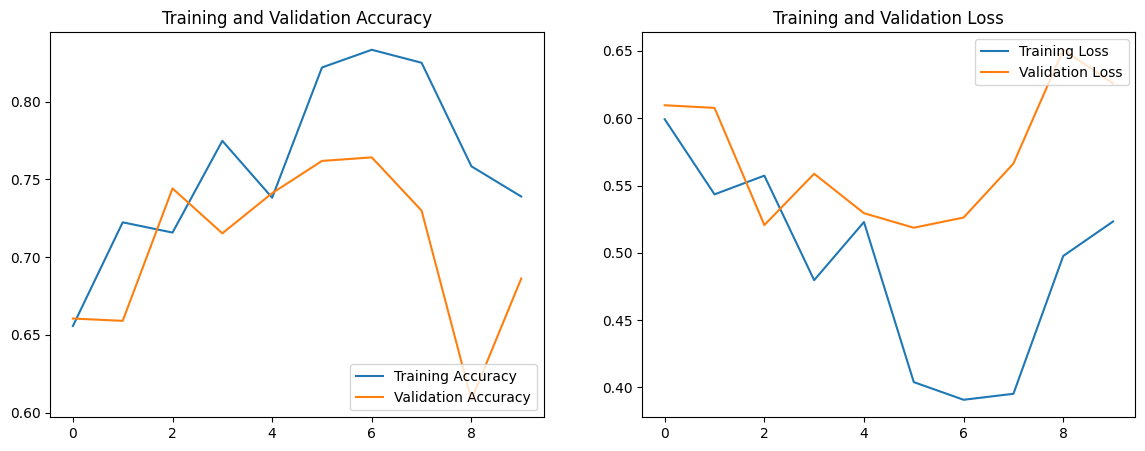

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()